# Hausaufgabe 2
## Ablassung eines Stausees
<!-- Lizensiert unter (CC BY 4.0) Gert Herold, 2021 -->

Wegen Reparaturarbeiten an der Staumauer einer Talsperre soll das Wasser abgelassen werden. Der See habe ein Fassungsvermögen von $215 \cdot 10^6\,\text{m}^3$. Die Oberfläche des Stausees erstrecke sich über $10\,\text{km}^2$. Der Wasserauslass auf Grundhöhe habe einen Querschnitt von $2\,\text{m}^2$. Der Fluss selbst werde so umgeleitet, dass kein Wasser in den See nachfließen kann.

### 1) Anfangsbedingungen

**1.1) Es werde angenommen, die Form des Sees lasse sich mit einem umgedrehten [Kegel](https://de.wikipedia.org/wiki/Kegel_(Geometrie)) annähern. Wie tief ist dann der See?**

Speichern Sie das Ergebnis (in Metern) in der Variablen `h0` und geben Sie sie aus.

In [1]:
h0 = None 
# Hier eigenen Code schreiben ...

V = 215 * 10**6 # Fassungsvermögen: m^3
oberflaeche = 10 * 10**6 # km^2 ->m^2
grundflaeche = 2 # m^2

# Tiefe = 3 * fassungsvermoegen / oberflaeche
h0 = 3 * V / oberflaeche
print(f'Die Tiefe des Sees: {h0} m')

Die Tiefe des Sees: 64.5 m


In [2]:
# Hier ist ein Plausibilitäts-Test:
assert 60 < h0 < 80

Vereinfachend werde angenommen, dass die sich ausbildende Strömung sich mithilfe der [Bernoulli-Gleichung](https://de.wikipedia.org/wiki/Bernoulli-Gleichung) beschreiben lasse:

$$
\frac{u^2}{2}+\frac{p}{\rho}+g \, z = \text{const}
$$

Dabei beschreibt $u$ die Strömungsgeschwindigkeit des Fluids an einer beliebigen betrachteten Stelle, $p$ den hydrodynamischen Druck, $\rho$ die Dichte und $z$ die Höhe. $g=9{,}81\frac{\text{m}}{\text{s}^2}$ ist die Erdbeschleunigung. Werden nur die Seeoberfläche und der Ausfluss betrachtet, so kann der Druck $p$ ebenfalls als konstant angenommen werden, da er dem Umgebungsdruck entspricht. Ebenso wird die Dichte als konstant angenommen, und die obige Gleichung vereinfacht sich zu 

$$
\frac{u^2}{2}+g \, z = \text{const}
$$

bzw. für oben und unten:

$$
\frac{u_\text{oben}^2}{2}+g \, z_\text{oben} = \frac{u_\text{unten}^2}{2}+g \, z_\text{unten}
$$

**1.2) Berechnen Sie die sich anfangs ausbildende Strömungsgeschwindigkeit am Ausfluss $u_\text{unten,0}$ (`u_unten0`) in m/s sowie den Volumenstrom $\dot{V_0}$ (`Vdot0`) in m³/s unter der Annahme, dass die Bewegung der Seeoberfläche vernachlässigbar ist.**

In [3]:
import numpy as np

In [4]:
u_unten0 = None # Strömungsgeschwindigkeit der Grundfläche
Vdot0 = None
# Hier eigenen Code schreiben ...

g = 9.81 # Erdbeschleunigung:  m/s^2
z_oben = h0 # 64.5m
z_unten = z_oben - h0 # = 0m
#u_oben = 0

'''
Strömungsgeschwindigkeit u_unten0
Formel: u^2_oben /2 + g * z_oben = u^2_unten / 2 + g * z_unten
=> u_unten^2 = 2 * g * z_oben
'''
u_unten0 = np.sqrt(2 * g * z_oben)
print(f'Strömungsgeschwindigkeit u_unten0: {u_unten0:.2f} m/s')
#type(u_unten0)

'''
Volumenstrom Vdot0
Formel: Volumenstrom(m^3/s) = Strömgeschwindigkeit * Querschnittfläche
'''
Vdot0 = u_unten0 * grundflaeche
print(f'Volumenstrom Vdot0: {Vdot0:.2f} m^3/s')

#const = u_unten0 /2 + g * z_unten
#print(f'const: {const:.2f}')


Strömungsgeschwindigkeit u_unten0: 35.57 m/s
Volumenstrom Vdot0: 71.15 m^3/s


In [5]:
# Hier sind einige Plausibilitäts-Tests:
assert u_unten0 > 30
assert Vdot0 < 80

Tipp: Um die Kreiszahl $\pi$ unter Python verwenden zu können, muss man sie entweder selbst definieren oder z.B. aus dem [NumPy-Modul](https://numpy.org/) importieren. Für ein Beispiel den folgenden Code-Abschnitt öffnen.

In [6]:
# Importiere pi aus numpy
from numpy import pi

# Berechne den "Radius" der Seeoberfläche
r0 = (oberflaeche/pi)**0.5
print(f'Radius: {r0/1000:.2f} km')

Radius: 1.78 km


### 2) Leerung des Sees

**2.1) Schreiben Sie eine Funktion, die die Tiefe des "Kegel"-Sees (in Metern) allgemein abhängig von der enthaltenen Wassermenge bestimmt.**

In [7]:
# radius der Oberfläche mit maximaler Wassermenge
r = r0
# tiefe(höhe) mit maximaler Wassermenge
h = h0

def tiefe(V):
    # Hier eigenen Code schreiben ...
    '''
    r / h = r0 / h0  => r0 = h0 * r / h ----(1)
    
    V = 1/3 * pi * r0**2 * h0
      = 1/3 * pi * (h0 * r / h)**2 *h0 [mit (1)]
      = 1/3 * pi * (r / h)**2 * h0**3
      
    => h0 = (3 * V / (pi * r**2 / h**2))**(1/3)
    '''
    
    h0 = (3 * V / (np.pi * r**2 / h**2))**(1/3)
    # print(f'Bei der Wassermenge {V/10**6:} km^3 ist die Tiefe {h0:.2f} m.')
    return h0

In [8]:
h0 = tiefe(V)
print(f'Bei der Wassermenge {V/10**6:.0f} km^3 ist die Tiefe {h0:.2f} m.')

Bei der Wassermenge 215 km^3 ist die Tiefe 64.50 m.


In [9]:
h0_1 = tiefe(10*10**6)
print(f'Bei der Wassermenge {10*10**6/10**6:.0f} km^3 ist die Tiefe {h0_1:.2f} m.')

Bei der Wassermenge 10 km^3 ist die Tiefe 23.20 m.


In [10]:
h0_2 = tiefe(1* 10**6)
print(f'Bei der Wassermenge {1*10**6/10**6:.0f} km^3 ist die Tiefe {h0_2:.2f} m.')

Bei der Wassermenge 1 km^3 ist die Tiefe 10.77 m.


In [11]:
# Hier sind einige Plausibilitäts-Tests:
assert abs(h0-tiefe(215e6)) < 1e-5
assert abs(50-tiefe(1e8)) < 0.1

**2.2) Schreiben Sie eine Funktion, die den diskreten Zeitverlauf der Wassertiefe $h(t)$ bis zur Leerung des Sees zurückgibt.**

  * Die Funktion soll ein Startvolumen $V_0$ und eine Zeitschrittweite $\Delta t$ übergeben bekommen.
  * Verwenden Sie in den Berechnungen standardmäßig [SI-Einheiten](https://de.wikipedia.org/wiki/Internationales_Einheitensystem).
  * Beachten Sie, dass sich auch der Volumenstrom zeitlich ändert.
  * Die Funktion soll alle berechneten Zeiten und die jeweils zugehörigen Tiefen in zwei getrennten Listen zurückgeben.
  
Hinweis: Die Änderung des Volumens lässt sich annähernd über $V_{n+1}=V_n-\dot{V_n} \cdot \Delta t$ beschreiben.

In [12]:
def abfluss(V0, dt): # dt: Zeitschrittweite
    # Hier eigenen Code schreiben ...
    # Zeitverlauf
    t = 0
    # Zeiten in List
    zeiten = []
    # die zugehörige Tiefen
    tiefen = []
    
    while V0 > 0:
        # Zeit
        #print(t)
        zeiten.append(t)
        
        # Tiefe
        ht = tiefe(V0) 
        #print(h0)
        tiefen.append(ht)
        
        # Strömungsgeschwindigkeit
        u_unten0 = np.sqrt(2 * g * ht)
        
        # Volumenstrom
        Vdot0 = u_unten0 * grundflaeche
        
        # Aktualisierung des Volumenstroms
        V0 = V0 - Vdot0 * dt
        
        # aktualisierung der Zeit 
        t = t + dt
    #print(zeiten)
    #print(tiefen)
    return zeiten, tiefen

In [13]:
zeiten, tiefen = abfluss(V, 10**6)
print(f'Zeiten: {zeiten}')
print(f'Tiefen: {tiefen}')

Zeiten: [0, 1000000, 2000000, 3000000]
Tiefen: [64.49999999999999, 56.41389428871544, 45.866946877355986, 27.855155353239425]


In [14]:
# Hier sind einige Plausibilitäts-Tests:
assert len(abfluss(10,1))==2
assert type(abfluss(10,1)[0])==type(abfluss(10,1)[1])==list

**2.3) Wie lange dauert es, bis der Stausee komplett abgelassen wurde?** 

Plotten Sie den Zeitverlauf der Wassertiefe bis zur Leerung für zwei Zeitschrittweiten:
  * $\Delta t_1$ = 1 Minute
  * $\Delta t_2$ = 4 Tage

**Diskutieren Sie Auffälligkeiten.**

In [15]:
%matplotlib inline
from matplotlib.pyplot import plot, show
# Plotbefehl: plot(x_werte_liste, y_werte_liste)

# Hier eigenen Code schreiben ...

def plotTiefen(V):
    import matplotlib.pyplot as plt
    
    plt. figure(figsize=(8,5))

    dt1 = 1 * 60
    dt2 = 4 * 24 * 60 * 60
    zeiten_1, tiefen_1 = abfluss(V, dt1)
    plot(zeiten_1, tiefen_1, label='dt2= 1 minute')
    #print(zeiten_1)

    zeiten_2,tiefen_2 = abfluss(V, dt2)
    plot(zeiten_2, tiefen_2,label='dt2 = 4 Tage')
    plt.legend()
    plt.xlabel('Zeit [s]')
    plt.ylabel('Tiefe [m]')
    plt.grid()

    show()

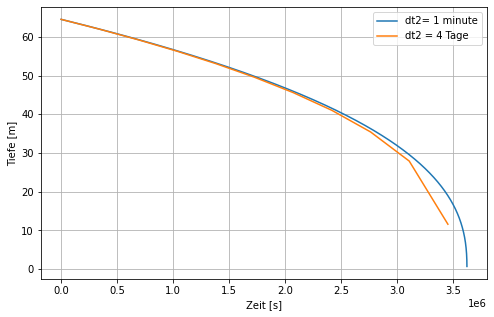

In [16]:
plotTiefen(V)

Der Graph impliziert, dass die Tiefe sich im Laufe der Zeit schneller (exponentiell) kleiner wird.
Bei der Zeitschrittweit 4 Tage sind die Werte nicht genau zu messen.

### 3) Anderer See

Wiederholen Sie Aufgabenteil 2.3) unter der Annahme, dass der See bei gleichem Volumen und gleicher Oberfläche annähernd durch einen *Zylinder* beschrieben wird. Schreiben Sie hierfür möglichst wenig neuen Code.

In [17]:
# Hier eigenen Code schreiben ...
'''
Formel für Zylinder
V = oberfläche * Tiefe
'''
def tiefe(V):
    h0_zyl = V / oberflaeche
    return h0_zyl

In [18]:
tiefe(V)

21.5

In [19]:
zeiten_zyl, tiefen_zyl = abfluss(V, 10**6)
print(f'Zeiten bei Zylinder: {zeiten_zyl}')
print(f'Tiefen bei Zylinder: {tiefen_zyl}')

Zeiten bei Zylinder: [0, 1000000, 2000000, 3000000, 4000000, 5000000, 6000000, 7000000, 8000000]
Tiefen bei Zylinder: [21.5, 17.39229991357694, 13.697780056792414, 10.419058081910938, 7.559534208486605, 5.12381615279537, 3.1185304083903973, 1.5541063404009074, 0.4497229577177776]


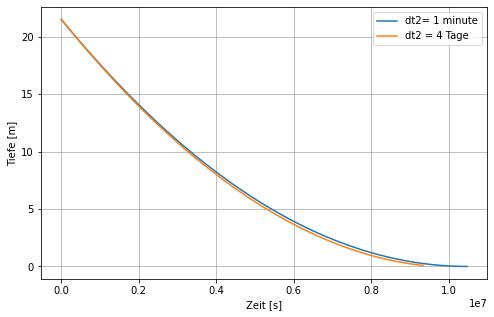

In [62]:
plotTiefen(V)